无监督聚类算法:在没有任何先验信息的条件下，对数据进行分类，是的同一类之间的样本差别尽可能的小，不同类之间的样本差距尽可能大。可用的算法：kmeans,DBSCAN,层次聚类，混合高斯模型
注：感谢狗熊会提供的数据！

In [1]:
'''1.导入必要的库，对整体情况进行设定'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture
import pandas as pd
import numpy as np
import xlrd as xr
import matplotlib as mpl
from matplotlib.patches import ConnectionPatch
import datetime
import matplotlib.dates as mdates
mpl.rcParams['font.sans-serif'] = ['SimHei']  #显示中文SimHei,FangSong,KaiTi,YouYuan
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
'''2.读取数据'''
data_orig=pd.read_excel("TVSports.xlsx")  #读取原始的数据
print('Data structure:',type(data_orig),data_orig.shape)  #数据的大小，记录数，列数
print('\n Part data is:\n',data_orig.head(2))
print('\n Specific col:\n',data_orig.球员[:3])

Data structure: <class 'pandas.core.frame.DataFrame'> (2448, 19)

 Part data is:
         球员  出场数  上场总时间（min）    投篮率  命中次数  出手次数  三分投球率  三分命中次数  三分出手次数    罚球率  \
0  勒布朗-詹姆斯  239       10059  0.491  2457  5006  0.332     370    1116  0.743   
1   迈克尔-乔丹  179        7474  0.487  2188  4497  0.332     148     446  0.828   

   罚球命中次数  罚球出手次数   篮板数  助攻次数  抢断次数  盖帽次数  失误次数  犯规次数  生涯总得分  
0    1627    2191  2122  1687   419   232   866   569   6911  
1    1463    1766  1152  1022   376   158   546   541   5987  

 Specific col:
 0    勒布朗-詹姆斯
1     迈克尔-乔丹
2    卡里姆-贾巴尔
Name: 球员, dtype: object


In [3]:
'''3.做描述性统计分析'''
data_dsrb=data_orig.describe()
print('\n 描述性统计的结果：\n',data_dsrb)
'''其他的描述性统计的结果'''
print('Skew of data is:\n',data_orig.skew())
print('Kurt of data is:\n',data_orig.kurt())
print('Cov of data is:\n',data_orig.cov())
print('Corr of data is:\n',data_orig.corr())
print('Var of data is:\n',data_orig.var())


 描述性统计的结果：
                出场数    上场总时间（min）          投篮率         命中次数         出手次数  \
count  2448.000000   2448.000000  2448.000000  2448.000000  2448.000000   
mean     30.200980    694.005310     0.399390   113.520016   255.018791   
std      36.201978   1191.097339     0.170179   221.315409   473.351445   
min       1.000000      0.000000     0.000000     0.000000     0.000000   
25%       6.000000     19.000000     0.345000     5.000000    14.000000   
50%      16.000000    193.000000     0.421000    31.000000    74.000000   
75%      41.000000    841.500000     0.476000   122.000000   287.250000   
max     259.000000  10059.000000     1.000000  2457.000000  5006.000000   

             三分投球率       三分命中次数       三分出手次数          罚球率       罚球命中次数  \
count  2448.000000  2448.000000  2448.000000  2448.000000  2448.000000   
mean      0.131254    11.228758    32.449755     0.617393    64.779820   
std       0.201119    34.697325    95.997475     0.293381   137.931446   
min       0.000

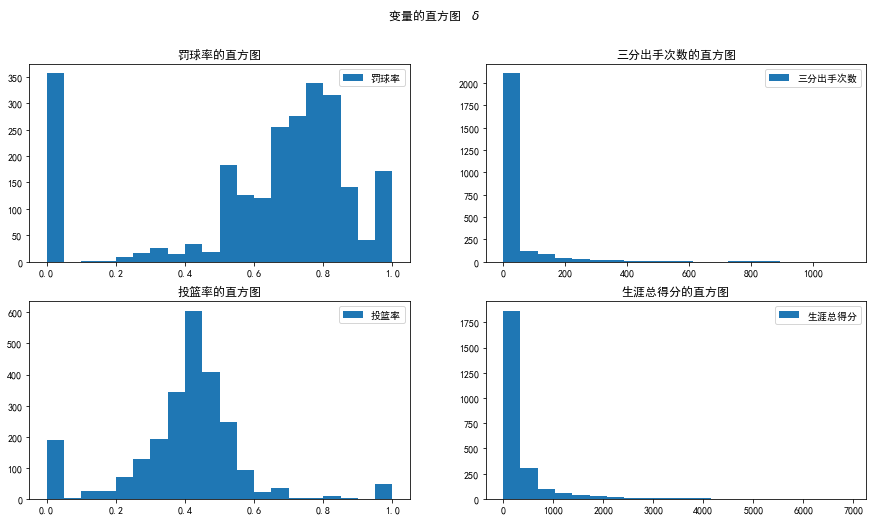

In [7]:
'''4. 图形化数据的描述'''
#做变量的直方图
n_bins=20
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))  #定义多子图句柄
ax0, ax1, ax2, ax3 = axes.flat
colors = ['r', 'g', 'b']
ax0.hist(data_orig.罚球率, n_bins, histtype='bar', label='罚球率')
ax0.legend(prop={'size': 10})
ax0.set_title('罚球率的直方图')
ax1.hist(data_orig.三分出手次数, n_bins, histtype='bar', label='三分出手次数')
ax1.legend(prop={'size': 10})
ax1.set_title('三分出手次数的直方图')
ax2.hist(data_orig.投篮率, n_bins, histtype='bar', label='投篮率')
ax2.legend(prop={'size': 10})
ax2.set_title('投篮率的直方图')
ax3.hist(data_orig.生涯总得分, n_bins, histtype='bar', label='生涯总得分')
ax3.legend(prop={'size': 10})
ax3.set_title('生涯总得分的直方图')
plt.suptitle('变量的直方图$\quad \delta$')
plt.show()

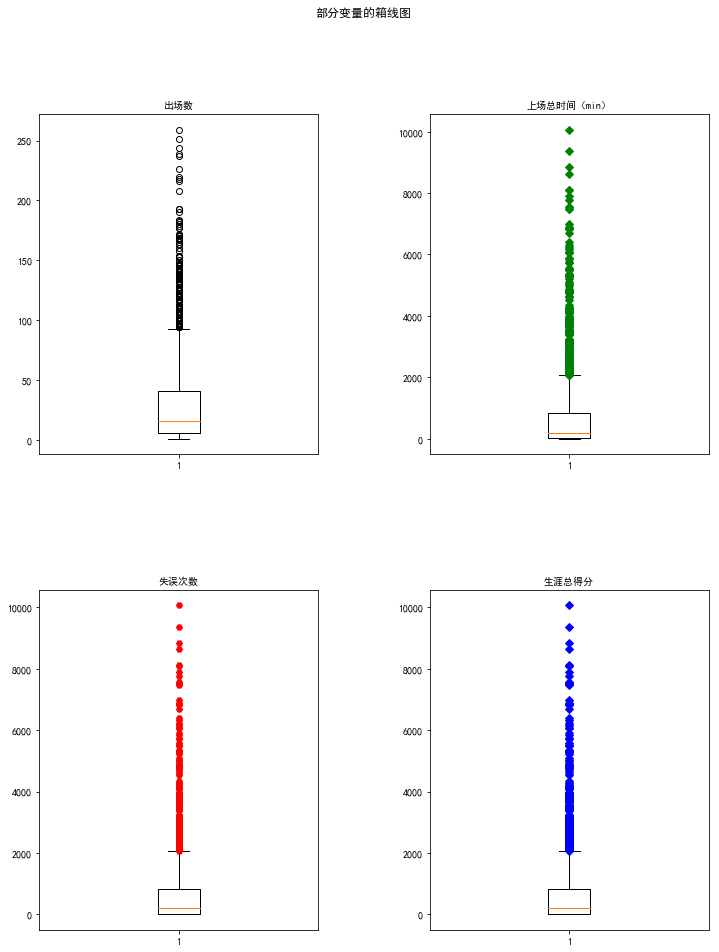

In [5]:
#箱线图
data = data_orig[data_orig.columns[1:]]
fs = 10 # 字体的大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))
axes[0, 0].boxplot(data[data_orig.columns[1]])
axes[0, 0].set_title(data_orig.columns[1], fontsize=fs)
axes[0, 1].boxplot(data[data_orig.columns[2]],0,'gD')
axes[0, 1].set_title(data_orig.columns[2], fontsize=fs)
axes[1, 0].boxplot(data[data_orig.columns[2]],0,'rH')
axes[1, 0].set_title(data_orig.columns[16], fontsize=fs)
axes[1, 1].boxplot(data[data_orig.columns[2]],0,'bD')
axes[1, 1].set_title(data_orig.columns[18], fontsize=fs)
fig.subplots_adjust(hspace=0.4,wspace=.4)
fig.suptitle('部分变量的箱线图')
plt.show()

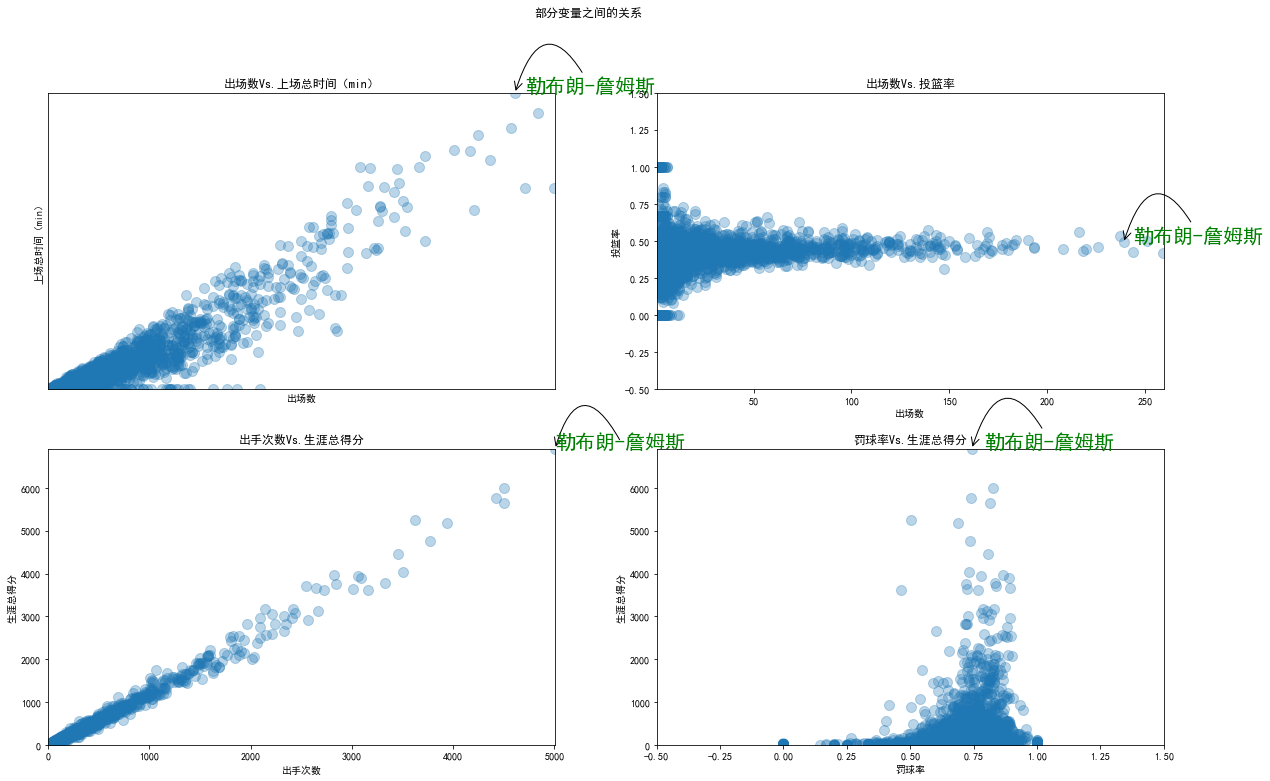

In [6]:
'''散点图'''
x=data_orig[data_orig.columns[1]]  
y=data_orig[data_orig.columns[2]]  
species=data_orig[data_orig.columns[0]]  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12))  #定义多子图句柄
ax0, ax1, ax2, ax3 = axes.flat
#定义刻度的范围值
x_min, x_max=x.min()-.5, x.max()+.5
y_min, y_max=y.min()-.5, y.max()+.5
#图形句柄
ax0.set_title(data_orig.columns[1]+'Vs.'+data_orig.columns[2])
ax0.scatter(x,y,s=100,alpha=0.3)
ax0.set_xlabel(data_orig.columns[1])
ax0.set_ylabel(data_orig.columns[2])
ax0.set_xlim(x_min,x_max)
ax0.set_ylim(y_min,y_max)
ax0.set_xticks(())  #取消刻度显示
ax0.set_yticks(())
ax0.annotate((data_orig[data_orig.columns[0]])[0],xy=[x[0],y[0]],xytext=[x[0]+5,y[0]],color='green',fontsize=20,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=1.2"))

x=data_orig[data_orig.columns[1]]  
y=data_orig[data_orig.columns[3]] 
ax1.set_title(data_orig.columns[1]+'Vs.'+data_orig.columns[3])
ax1.scatter(x,y,s=100,alpha=0.3)
ax1.set_xlabel(data_orig.columns[1])
ax1.set_ylabel(data_orig.columns[3])
#定义刻度的范围值
x_min, x_max=x.min()-.5, x.max()+.5
y_min, y_max=y.min()-.5, y.max()+.5
ax1.set_xlim(x_min,x_max)
ax1.set_ylim(y_min,y_max)
ax1.annotate((data_orig[data_orig.columns[0]])[0],xy=[x[0],y[0]],xytext=[x[0]+5,y[0]],color='green',fontsize=20,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=1.2"))

x=data_orig[data_orig.columns[5]]  
y=data_orig[data_orig.columns[18]] 
ax2.set_title(data_orig.columns[5]+'Vs.'+data_orig.columns[18])
ax2.scatter(x,y,s=100,alpha=0.3)
ax2.set_xlabel(data_orig.columns[5])
ax2.set_ylabel(data_orig.columns[18])
#定义刻度的范围值
x_min, x_max=x.min()-.5, x.max()+.5
y_min, y_max=y.min()-.5, y.max()+.5
ax2.set_xlim(x_min,x_max)
ax2.set_ylim(y_min,y_max)
ax2.annotate((data_orig[data_orig.columns[0]])[0],xy=[x[0],y[0]],xytext=[x[0]+5,y[0]],color='green',fontsize=20,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=1.2"))

x=data_orig[data_orig.columns[9]]  
y=data_orig[data_orig.columns[18]] 
ax3.set_title(data_orig.columns[9]+'Vs.'+data_orig.columns[18])
ax3.scatter(x,y,s=100,alpha=0.3)
ax3.set_xlabel(data_orig.columns[9])
ax3.set_ylabel(data_orig.columns[18])
#定义刻度的范围值
x_min, x_max=x.min()-.5, x.max()+.5
y_min, y_max=y.min()-.5, y.max()+.5
ax3.set_xlim(x_min,x_max)
ax3.set_ylim(y_min,y_max)
ax3.annotate((data_orig[data_orig.columns[0]])[0],xy=[x[0],y[0]],xytext=[x[0]+.05,y[0]],color='green',fontsize=20,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=1.2"))

plt.suptitle('部分变量之间的关系')
plt.show()

In [7]:
'''应用KMeans方法进行聚类'''
clst=cluster.KMeans(n_clusters=4)
clst.fit(data)
predicted_labels=clst.predict(data)
predicted_labels

array([3, 3, 3, ..., 0, 0, 0])

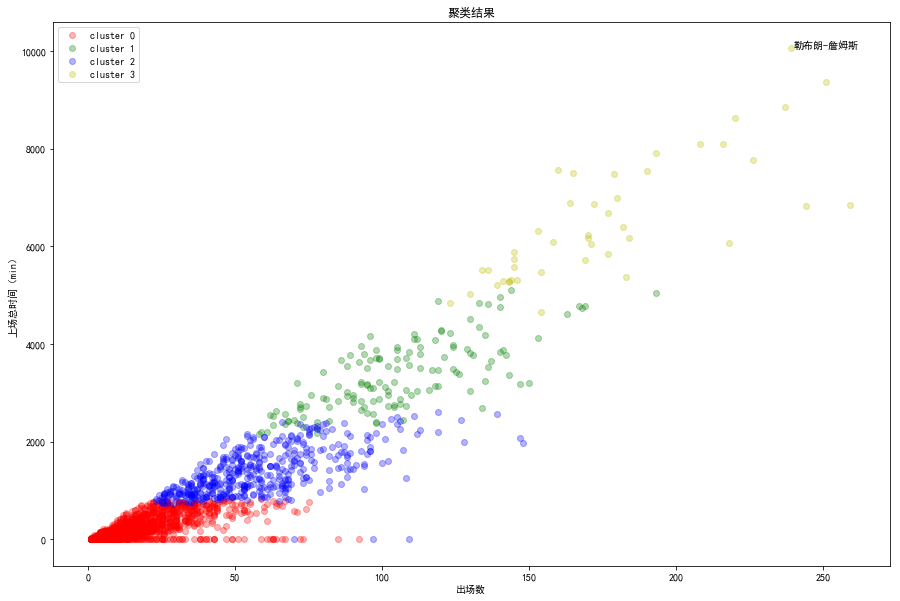

In [8]:
'''展示聚类结果'''
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=0.3)
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax.legend()
ax.set_title('聚类结果')
plt.show()

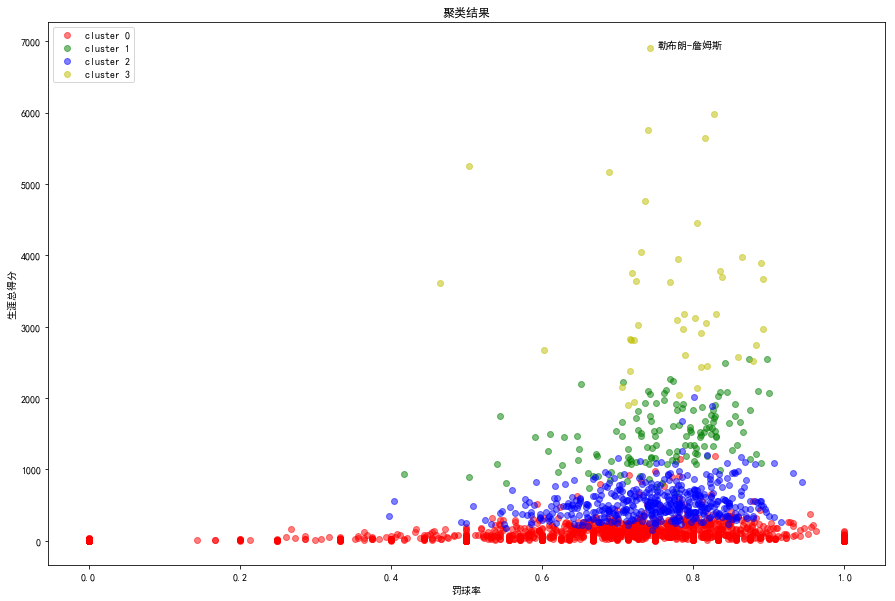

In [9]:
'''展示聚类结果'''
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax.scatter((data[data.columns[8]])[position],(data[data.columns[17]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=0.5)
ax.set_xlabel(data.columns[8])
ax.set_ylabel(data.columns[17])
ax.text((data[data.columns[8]])[0]+.01,(data[data.columns[17]])[0]+.1,(data_orig[data_orig.columns[0]])[0])
ax.legend(loc=2)
ax.set_title('聚类结果')
plt.show()

In [10]:
'''应用KMeans方法进行聚类'''
clst=cluster.KMeans(n_clusters=4,init='random')
clst.fit(data)
predicted_labels=clst.predict(data)
predicted_labels

array([1, 1, 1, ..., 0, 0, 0])

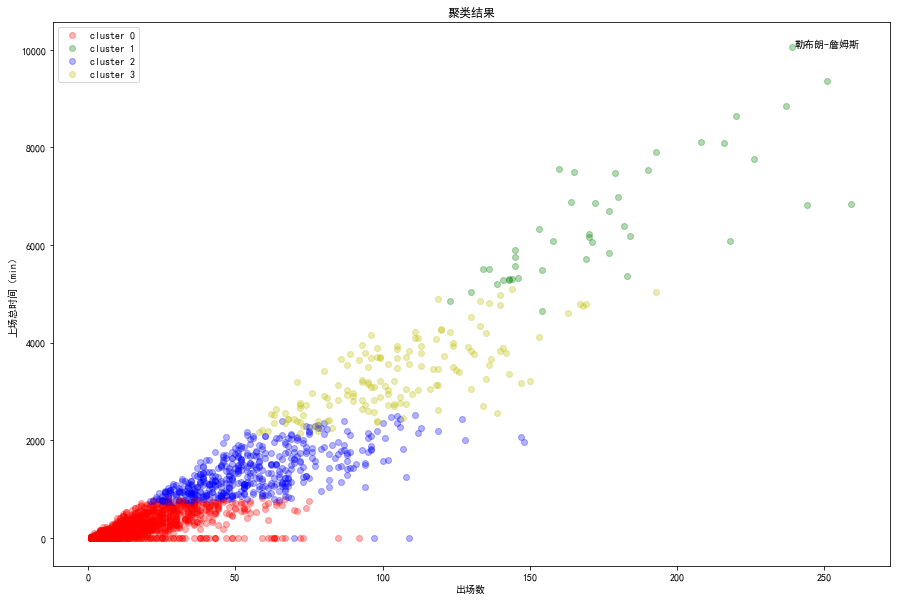

In [11]:
'''展示聚类结果'''
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=0.3)
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax.legend()
ax.set_title('聚类结果')
plt.show()

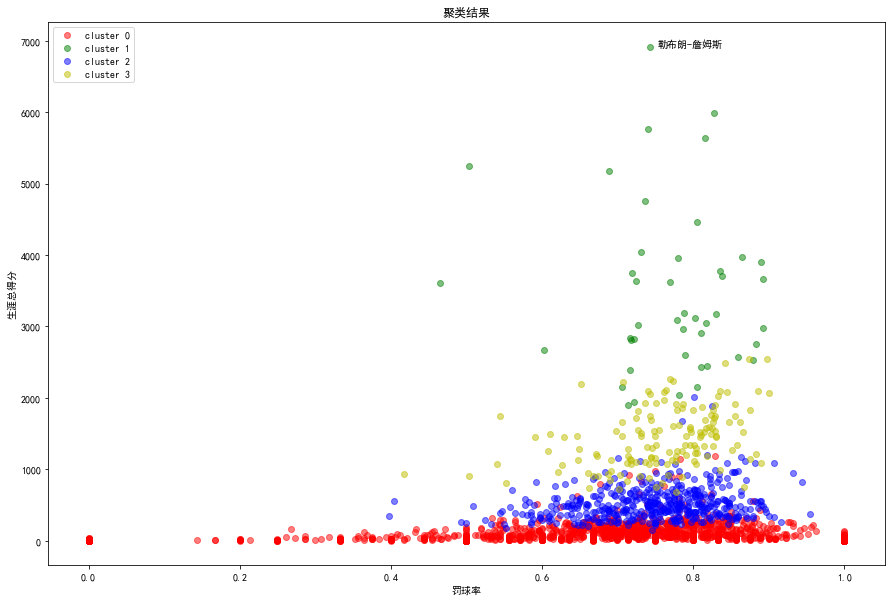

In [12]:
'''展示聚类结果'''
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax.scatter((data[data.columns[8]])[position],(data[data.columns[17]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=.5)
ax.set_xlabel(data.columns[8])
ax.set_ylabel(data.columns[17])
ax.text((data[data.columns[8]])[0]+.01,(data[data.columns[17]])[0]+.1,(data_orig[data_orig.columns[0]])[0])
ax.legend(loc=2)
ax.set_title('聚类结果')
plt.show()

In [13]:
'''应用KMeans方法进行聚类'''
clst=cluster.KMeans(n_clusters=8,init='random')
clst.fit(data)
predicted_labels=clst.predict(data)
predicted_labels

array([6, 6, 6, ..., 1, 1, 1])

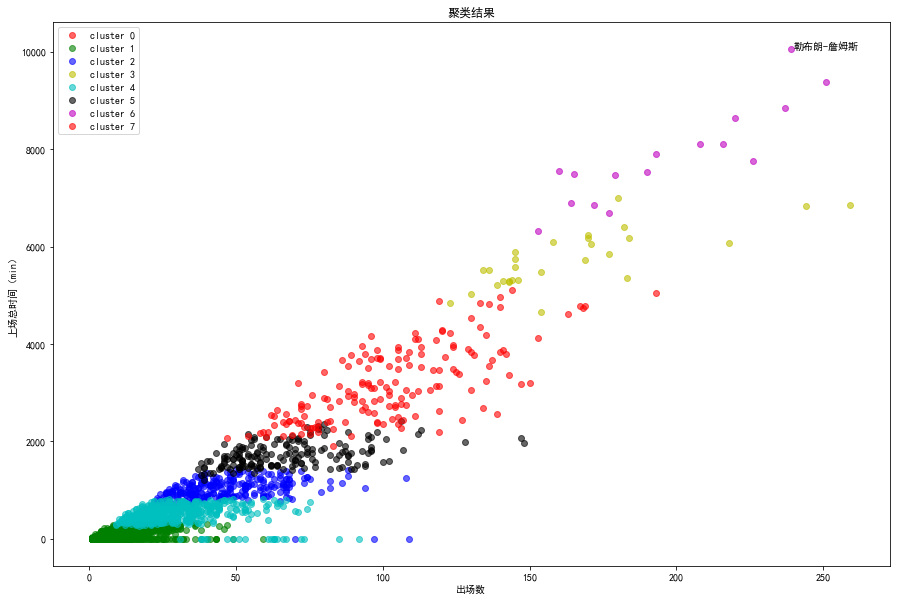

In [14]:
'''展示聚类结果'''
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=.6)
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax.legend()
ax.set_title('聚类结果')
plt.show()

In [15]:
'''应用DBSCAN算法'''
clst1=cluster.DBSCAN()
predicted_labels1=clst1.fit_predict(data)
print(predicted_labels1)
print('\n')
print(set(predicted_labels1))   #分成多少类

[-1 -1 -1 ... -1  1 -1]


{0, 1, -1}


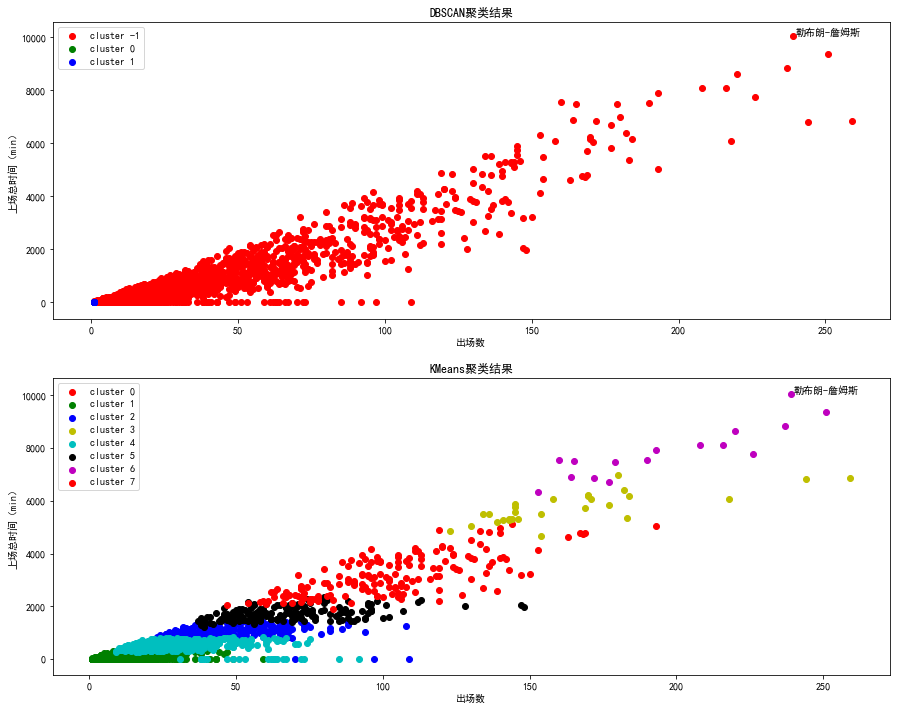

In [16]:
'''展示聚类结果'''

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))  #定义多子图句柄
ax0, ax1 = axes.flat

labels=np.unique(predicted_labels1)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels1==label
    ax0.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)])
ax0.set_xlabel(data.columns[0])
ax0.set_ylabel(data.columns[1])
ax0.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax0.legend()
ax0.set_title('DBSCAN聚类结果')

labels=np.unique(predicted_labels)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels==label
    ax1.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)])
ax1.set_xlabel(data.columns[0])
ax1.set_ylabel(data.columns[1])
ax1.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax1.legend()
ax1.set_title('KMeans聚类结果')

plt.show()

C:\Software\Anaconda\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\Software\Anaconda\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


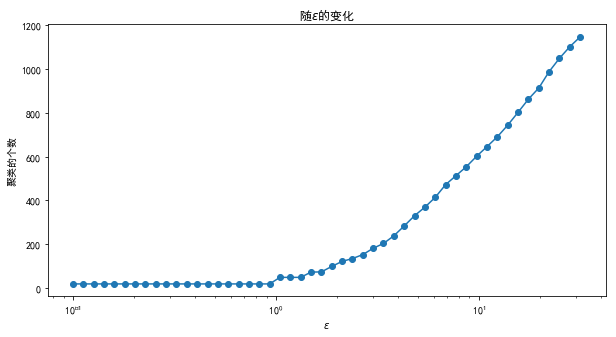

In [17]:
'''参数的影响分析'''
Core_nums=[]
epsilons=np.logspace(-1,1.5)
for epsilon in epsilons:
        clst6=cluster.DBSCAN(eps=epsilon)
        predicted_labels6=clst6.fit_predict(data)
        Core_nums.append(len(clst6.core_sample_indices_))  #样本到中心点距离之和
        
fig=plt.figure(figsize=[10,5])

ax=fig.add_subplot(1,1,1)
ax.plot(epsilons,Core_nums,marker='o')
ax.set_xlabel(r'$\epsilon$')
ax.set_xscale('log')
ax.set_ylabel('聚类的个数')
ax.set_title('随$\epsilon$的变化')

plt.show()  

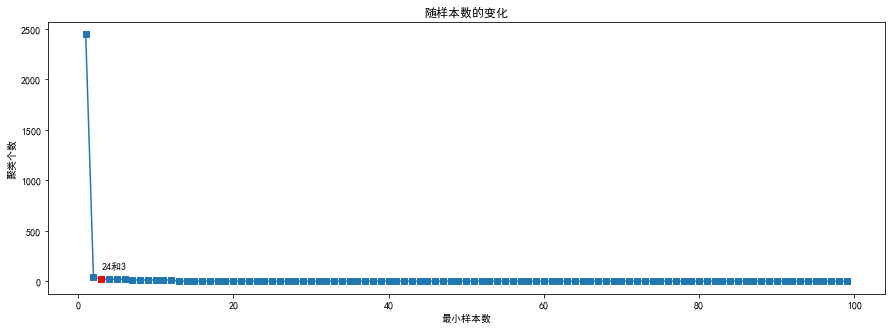

In [18]:
'''参数变化的影响分析'''
min_samples=np.arange(1,100)
Core_nums=[]
for num in min_samples:
    clst7=cluster.DBSCAN(min_samples=num)
    predicted_labels7=clst7.fit_predict(data)
    Core_nums.append(len(clst7.core_sample_indices_))

fig=plt.figure(figsize=[15,5])
ax=fig.add_subplot(1,1,1)
ax.plot(min_samples,Core_nums,marker='s')
ax.plot(min_samples[2],Core_nums[2],'rs')  #单独标记某个点
ax.text(min_samples[2],Core_nums[2]+100,str(Core_nums[2])+'和'+str(min_samples[2]))
ax.set_xlabel(r'最小样本数')
ax.set_ylabel('聚类个数')
ax.set_title('随样本数的变化')

plt.show()

In [19]:
'''应用层次聚类算法'''
clst2=cluster.AgglomerativeClustering()
predicted_labels2=clst2.fit_predict(data)
print('聚类数量：',np.unique(predicted_labels2))

聚类数量： [0 1]


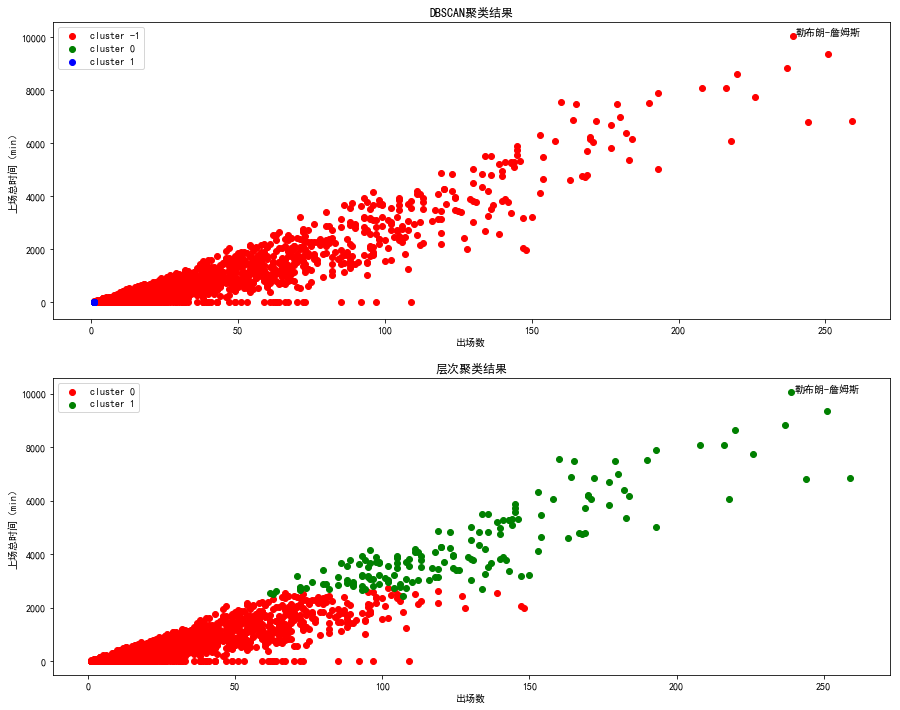

In [20]:
'''展示聚类结果'''
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))  #定义多子图句柄
ax0, ax1 = axes.flat

labels=np.unique(predicted_labels1)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels1==label
    ax0.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)])
ax0.set_xlabel(data.columns[0])
ax0.set_ylabel(data.columns[1])
ax0.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax0.legend()
ax0.set_title('DBSCAN聚类结果')

labels=np.unique(predicted_labels2)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels2==label
    ax1.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)])
ax1.set_xlabel(data.columns[0])
ax1.set_ylabel(data.columns[1])
ax1.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax1.legend()
ax1.set_title('层次聚类结果')

plt.show()

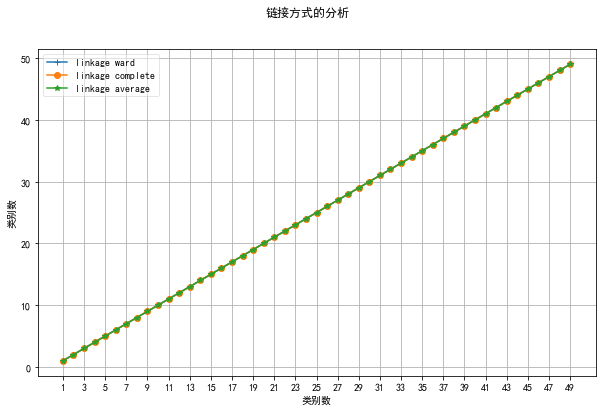

In [21]:
'''链接方式的影响分析'''
nums=range(1,50)
fig=plt.figure(figsize=[10,6])
ax=fig.add_subplot(1,1,1)
linkages=['ward','complete','average']
markers='+o*'

for i,linkage in enumerate(linkages):
    cls_num=[]
    for num in nums:
        clst2=cluster.AgglomerativeClustering(n_clusters=num,linkage=linkage)
        predicted_labels2=clst2.fit_predict(data)
        cls_num.append(len(set(predicted_labels2)))
    ax.plot(nums,cls_num,marker=markers[i],label="linkage %s"%linkage)

ax.set_xlabel('类别数')
ax.set_xticks(nums[::2])  #设置坐标轴间距
ax.set_ylabel('类别数')
ax.legend(loc='best',framealpha=.5)
plt.grid(True)

plt.suptitle('链接方式的分析')    
plt.show()  

In [22]:
'''采用混合高斯模型'''
clst4=mixture.GaussianMixture()
clst4.fit(data)
predicted_labels4=clst4.predict(data)
print(set(predicted_labels4))

{0}


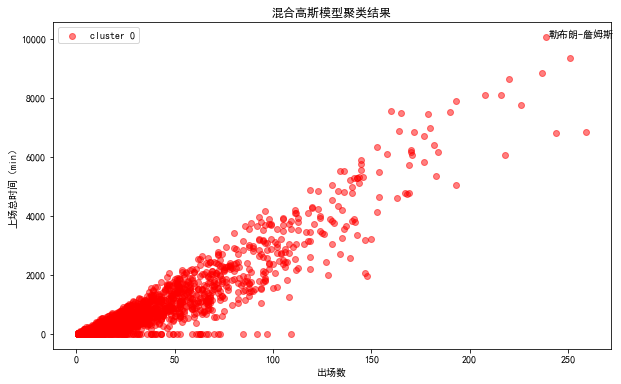

In [23]:
'''展示聚类结果'''
fig=plt.figure(figsize=[10,6])
ax0=fig.add_subplot(1,1,1)

labels=np.unique(predicted_labels4)
colors='rgbyckm'

for i,label in enumerate(labels):
    position=predicted_labels4==label
    ax0.scatter((data[data.columns[0]])[position],(data[data.columns[1]])[position],label='cluster %d'%label,color=colors[i%len(colors)],alpha=.5)
ax0.set_xlabel(data.columns[0])
ax0.set_ylabel(data.columns[1])
ax0.text((data[data.columns[0]])[0]+1,(data[data.columns[1]])[0]+1,(data_orig[data_orig.columns[0]])[0])
ax0.legend()
ax0.set_title('混合高斯模型聚类结果')
plt.show()

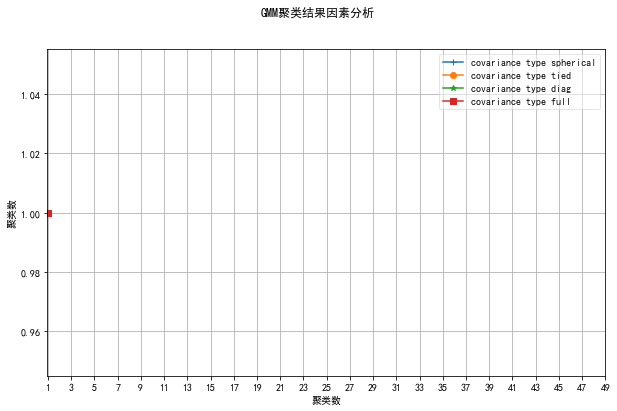

In [24]:
'''协方差类型参数的影响分析'''
fig=plt.figure(figsize=[10,6])
ax=fig.add_subplot(1,1,1)
cov_types=['spherical','tied','diag','full']
markers='+o*s'

for i,cov_type in enumerate(cov_types):
    cl_num=[]
    for num in nums:
        clst5=mixture.GaussianMixture(covariance_type=cov_type)
        clst5.fit(data)
        predicted_labels5=clst5.predict(data)
        cl_num.append(len(set(predicted_labels5)))
    ax.plot(cl_num,cl_num,marker=markers[i],label="covariance type %s"%cov_type)

ax.set_xlabel('聚类数')
ax.set_xticks(nums[::2])  #设置坐标轴间距
ax.set_ylabel('聚类数')
ax.legend(loc='best',framealpha=.5)
plt.grid(True)

plt.suptitle('GMM聚类结果因素分析')    
plt.show()  

In [25]:
'''应用KMeans方法进行聚类'''
clst9=cluster.KMeans(n_clusters=4)
clst9.fit(data)
predicted_labels9=clst9.predict(data)
predicted_labels9

array([2, 2, 2, ..., 0, 0, 0])

In [26]:
'''对全数据进行回归，因变量是生涯总得分'''
Y=data[data.columns[17]]
X=data[data.columns[:17]]

In [27]:
from sklearn import linear_model as lm

In [28]:
lrg1=lm.LinearRegression()  #实例化
lrg1.fit(X,Y)
print('Coefficients:%s, intercept %.2f'%(lrg1.coef_,lrg1.intercept_))
coe_list=lrg1.coef_.tolist()
coe_list.index(np.max(coe_list))
print('系数最大的为：',data.columns[coe_list.index(np.max(coe_list))])

Coefficients:[ 2.83239040e-03  3.29410139e-04  1.07743845e-01  1.99488009e+00
  3.42158876e-03 -3.69898239e-01  1.03152354e+00 -1.66611749e-02
  8.02044890e-02  9.96582738e-01  1.47268636e-03 -1.39849403e-03
 -1.61495259e-04  1.68292675e-02  8.89381342e-05 -3.98484488e-03
 -2.53785280e-03], intercept -0.05
系数最大的为： 命中次数


In [29]:
sort_list=coe_list.copy()
sort_list.sort(reverse=True)

In [30]:
for i in np.arange(len(coe_list)):
    for j in np.arange(len(coe_list)):
        if coe_list[j]==sort_list[i]:
            print('%d -th 系数为: %s'%(i+1,data.columns[j]))

1 -th 系数为: 命中次数
2 -th 系数为: 三分命中次数
3 -th 系数为: 罚球命中次数
4 -th 系数为: 投篮率
5 -th 系数为: 罚球率
6 -th 系数为: 抢断次数
7 -th 系数为: 出手次数
8 -th 系数为: 出场数
9 -th 系数为: 罚球出手次数
10 -th 系数为: 上场总时间（min）
11 -th 系数为: 盖帽次数
12 -th 系数为: 助攻次数
13 -th 系数为: 篮板数
14 -th 系数为: 犯规次数
15 -th 系数为: 失误次数
16 -th 系数为: 三分出手次数
17 -th 系数为: 三分投球率


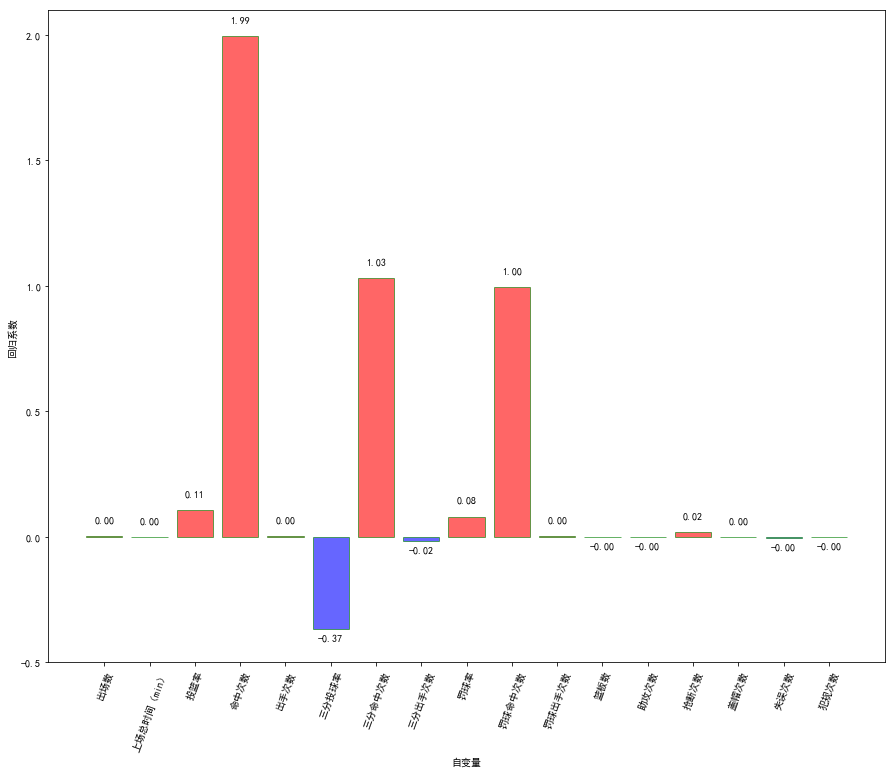

In [79]:
'''各参数的系数大小对比'''
fig=plt.figure(figsize=[15,12])
ax=fig.add_subplot(1,1,1)
'''不同颜色标记不同的柱子'''
clr=[]
for i in np.arange(len(coe_list)):
    if coe_list[i]>0:
        clr.append('r')
    else:
        clr.append('b')
#color参数
ax.bar(list(data.columns)[:17],coe_list,color=clr,edgecolor='g',alpha=.6)
#标记文本
for x,y in zip(list(data.columns)[:17],coe_list):
    if y>0:
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    else:
        plt.text(x, y-0.05, '%.2f' % y, ha='center', va= 'bottom')
ax.set_ylim(-.5,2.1)
ax.set_xlabel('自变量')
ax.set_ylabel('回归系数')
plt.xticks(rotation=70)
plt.show()

In [84]:
'''局部回归的结果分析'''
lbl=0
X1=X[predicted_labels9==lbl]
Y1=Y[predicted_labels9==lbl]

In [85]:
lrg1.fit(X1,Y1)
print('Coefficients:%s, intercept %.2f'%(lrg1.coef_,lrg1.intercept_))
coe_list=lrg1.coef_.tolist()
coe_list.index(np.max(coe_list))
print('系数最大的为：',data.columns[coe_list.index(np.max(coe_list))])

Coefficients:[ 1.79366810e-04 -1.21873648e-05  3.37978511e-03  2.00053875e+00
  2.28344051e-04 -9.54788686e-02  1.01332374e+00 -7.11076446e-03
 -5.05716602e-03  1.00097181e+00 -1.27039854e-03 -5.18381194e-04
  1.97836146e-04  6.49631132e-03 -3.72778625e-03  4.78356414e-03
 -5.03141122e-04], intercept 0.00
系数最大的为： 命中次数


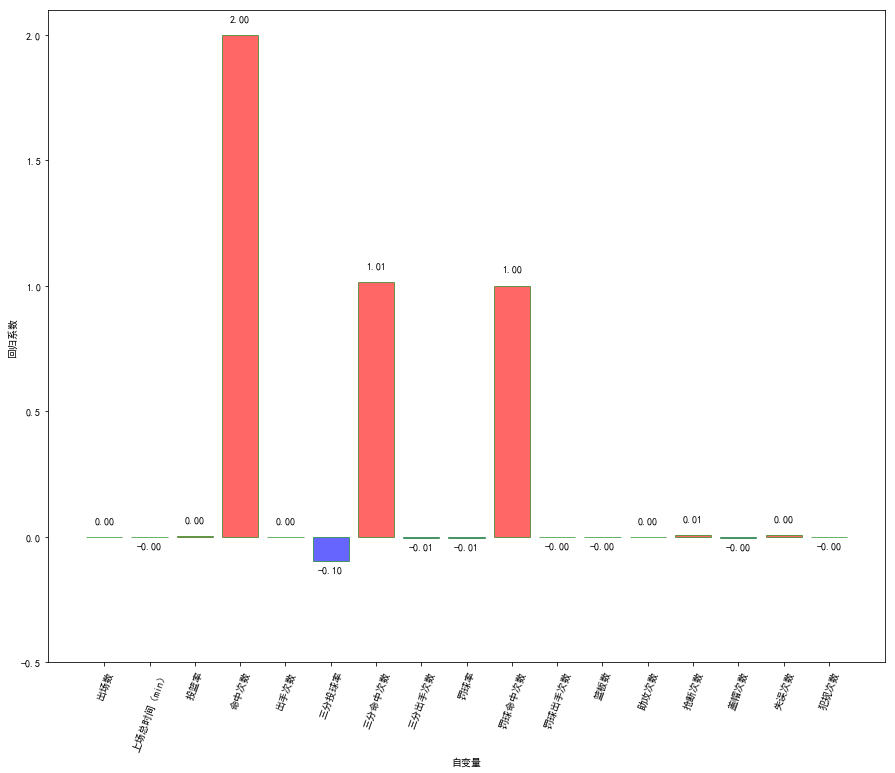

In [86]:
'''各参数的系数大小对比'''
fig=plt.figure(figsize=[15,12])
ax=fig.add_subplot(1,1,1)
'''不同颜色标记不同的柱子'''
clr=[]
for i in np.arange(len(coe_list)):
    if coe_list[i]>0:
        clr.append('r')
    else:
        clr.append('b')
#color参数
ax.bar(list(data.columns)[:17],coe_list,color=clr,edgecolor='g',alpha=.6)
#标记文本
for x,y in zip(list(data.columns)[:17],coe_list):
    if y>0:
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    else:
        plt.text(x, y-0.05, '%.2f' % y, ha='center', va= 'bottom')
ax.set_ylim(-.5,2.1)
ax.set_xlabel('自变量')
ax.set_ylabel('回归系数')
plt.xticks(rotation=70)
plt.show()

In [87]:
lbl=1
X1=X[predicted_labels9==lbl]
Y1=Y[predicted_labels9==lbl]
lrg1.fit(X1,Y1)
print('Coefficients:%s, intercept %.2f'%(lrg1.coef_,lrg1.intercept_))
coe_list=lrg1.coef_.tolist()
coe_list.index(np.max(coe_list))
print('系数最大的为：',data.columns[coe_list.index(np.max(coe_list))])

Coefficients:[ 6.33658449e-03 -3.19186624e-04 -1.33180852e+01  2.00831494e+00
 -2.77367673e-03 -2.32797521e+00  1.01671083e+00 -8.57904890e-03
  3.56864037e+00  9.96036998e-01  1.72608543e-03 -2.55543776e-04
 -5.07253194e-04  9.89641761e-03 -1.42186300e-04  9.32392533e-04
 -6.91745304e-04], intercept 3.87
系数最大的为： 罚球率


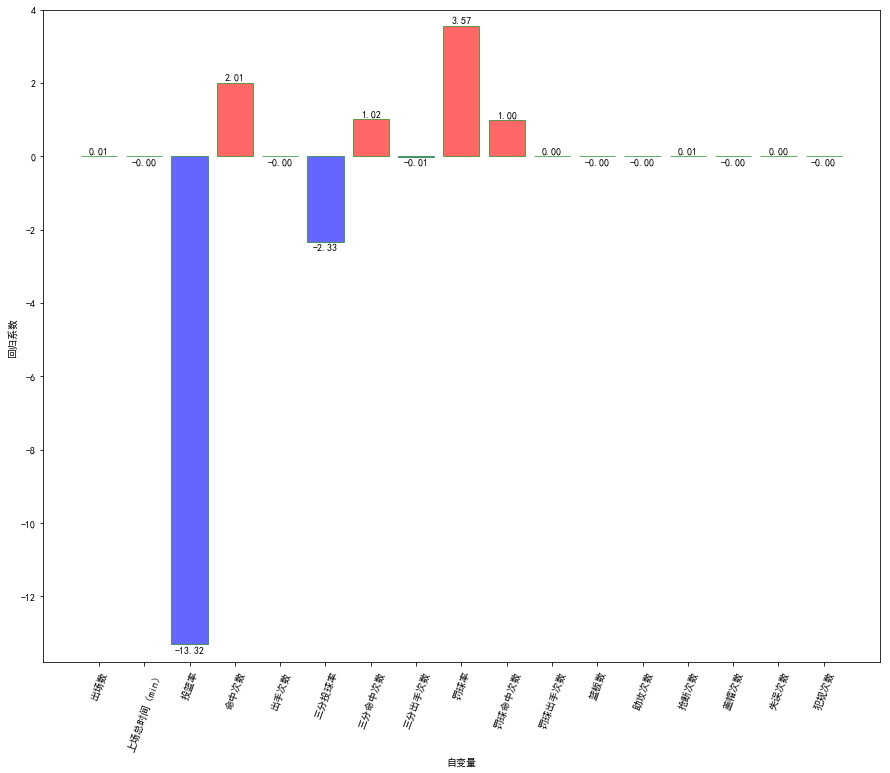

In [96]:
'''各参数的系数大小对比'''
fig=plt.figure(figsize=[15,12])
ax=fig.add_subplot(1,1,1)
'''不同颜色标记不同的柱子'''
clr=[]
for i in np.arange(len(coe_list)):
    if coe_list[i]>0:
        clr.append('r')
    else:
        clr.append('b')
#color参数
ax.bar(list(data.columns)[:17],coe_list,color=clr,edgecolor='g',alpha=.6)
#标记文本
for x,y in zip(list(data.columns)[:17],coe_list):
    if y>0:
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    else:
        plt.text(x, y-0.25, '%.2f' % y, ha='center', va= 'bottom')
ax.set_ylim(-13.8,4)
ax.set_xlabel('自变量')
ax.set_ylabel('回归系数')
plt.xticks(rotation=70)
plt.show()

In [38]:
lbl=1
data[predicted_labels9==lbl]

,出场数,上场总时间（min）,投篮率,命中次数,出手次数,三分投球率,三分命中次数,三分出手次数,罚球率,罚球命中次数,罚球出手次数,篮板数,助攻次数,抢断次数,盖帽次数,失误次数,犯规次数,生涯总得分
0,239,10059,0.491,2457,5006,0.332,370,1116,0.743,1627,2191,2122,1687,419,232,866,569,6911
1,179,7474,0.487,2188,4497,0.332,148,446,0.828,1463,1766,1152,1022,376,158,546,541,5987
2,237,8851,0.533,2356,4422,0.000,0,0,0.740,1050,1419,2481,767,0,0,0,797,5762
3,220,8635,0.448,2014,4499,0.331,292,882,0.816,1320,1617,1119,1040,310,144,647,660,5640
4,216,8099,0.563,2041,3627,0.000,0,0,0.504,1168,2317,2508,582,117,459,649,769,5250
5,251,9372,0.501,1975,3939,0.143,5,35,0.689,1217,1766,2859,764,168,568,633,701,5172
6,193,7907,0.463,1743,3768,0.162,6,37,0.736,1269,1725,2062,610,258,135,550,661,4761
7,153,6321,0.469,1622,3460,0.000,0,0,0.805,1213,1506,855,970,0,0,0,451,4457
8,226,7766,0.461,1613,3502,0.309,119,385,0.731,700,958,667,1143,198,19,594,429,4045
9,136,5513,0.474,1340,2827,0.351,297,847,0.865,999,1155,1057,548,137,161,429,336,3976


In [34]:
print(data.head(6),data.shape)
print(data[data.columns[0]])

   出场数  上场总时间（min）    投篮率  命中次数  出手次数  三分投球率  三分命中次数  三分出手次数    罚球率  罚球命中次数  \
0  239       10059  0.491  2457  5006  0.332     370    1116  0.743    1627   
1  179        7474  0.487  2188  4497  0.332     148     446  0.828    1463   
2  237        8851  0.533  2356  4422  0.000       0       0  0.740    1050   
3  220        8635  0.448  2014  4499  0.331     292     882  0.816    1320   
4  216        8099  0.563  2041  3627  0.000       0       0  0.504    1168   
5  251        9372  0.501  1975  3939  0.143       5      35  0.689    1217   

   罚球出手次数   篮板数  助攻次数  抢断次数  盖帽次数  失误次数  犯规次数  生涯总得分  
0    2191  2122  1687   419   232   866   569   6911  
1    1766  1152  1022   376   158   546   541   5987  
2    1419  2481   767     0     0     0   797   5762  
3    1617  1119  1040   310   144   647   660   5640  
4    2317  2508   582   117   459   649   769   5250  
5    1766  2859   764   168   568   633   701   5172   (2448, 18)
0       239
1       179
2       237
3       220
4 

In [1]:
from sklearn import cluster

In [3]:
help(cluster.k_means)

Help on function k_means in module sklearn.cluster.k_means_:

k_means(X, n_clusters, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=1, algorithm='auto', return_n_iter=False)
    K-means clustering algorithm.
    
    Read more in the :ref:`User Guide <k_means>`.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.
    
    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.
    
    max_iter : int, optional, default 300
        Maximum number of iterations of the k-means algorithm to run.
    
    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    
    init : {'k-means++', 

In [2]:
help(cluster.dbscan)

Help on function dbscan in module sklearn.cluster.dbscan_:

dbscan(X, eps=0.5, min_samples=5, metric='minkowski', algorithm='auto', leaf_size=30, p=2, sample_weight=None, n_jobs=1)
    Perform DBSCAN clustering from vector array or distance matrix.
    
    Read more in the :ref:`User Guide <dbscan>`.
    
    Parameters
    ----------
    X : array or sparse (CSR) matrix of shape (n_samples, n_features), or             array of shape (n_samples, n_samples)
        A feature array, or array of distances between samples if
        ``metric='precomputed'``.
    
    eps : float, optional
        The maximum distance between two samples for them to be considered
        as in the same neighborhood.
    
    min_samples : int, optional
        The number of samples (or total weight) in a neighborhood for a point
        to be considered as a core point. This includes the point itself.
    
    metric : string, or callable
        The metric to use when calculating distance between instance